In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
med_exa= pd.read_csv('medical_examination.csv',index_col='id')

In [4]:
med_exa.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
med_exa['age']=np.divide(med_exa['age'],365).astype('int')
med_exa['height']=np.divide(med_exa['height'],100)
med_exa.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0


In [6]:

BMI = med_exa['weight'] / (med_exa['height'] ** 2)
BMI_DF = pd.DataFrame(BMI, columns=['BMI'])


BMI_DF.head()

,BMI
id,
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


In [7]:
med_exa['overweight']=None
med_exa['overweight'] = np.where(BMI_DF['BMI'] > 25, 1,0)

med_exa.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,0


# Data Normalization


In [8]:
med_exa['cholesterol']=np.where(med_exa['cholesterol']==1,0,1)
med_exa['gluc']=np.where(med_exa['gluc']==1,0,1)
med_exa.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [9]:
medexa_df=med_exa.melt(id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
medexa_df.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [10]:
print(med_exa.isnull().sum())


age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
overweight     0
dtype: int64


<Figure size 1200x600 with 0 Axes>

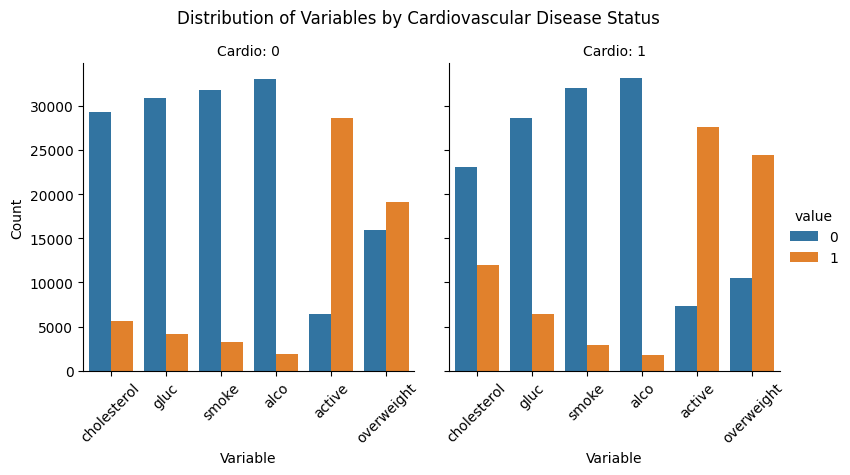

In [11]:
plt.figure(figsize=(12, 6))
g = sns.catplot(x='variable', hue='value', col='cardio', data=medexa_df, kind='count', height=4, aspect=1) 
g.set_axis_labels("Variable", "Count")
g.set_titles("Cardio: {col_name}") 
g.fig.suptitle("Distribution of Variables by Cardiovascular Disease Status", y=1.05)
g.set_xticklabels(rotation=45)
plt.show()


# Data Cleaning

In [12]:

med_exa = med_exa[med_exa['ap_lo'] <= med_exa['ap_hi']]


med_exa = med_exa[
    (med_exa['height'] >= med_exa['height'].quantile(0.025))
    & (med_exa['height'] <= med_exa['height'].quantile(0.975))
]

# 3. Filter for weight within normal range (2.5th to 97.5th percentile)
med_exa = med_exa[
    (med_exa['weight'] >= med_exa['weight'].quantile(0.025))
    & (med_exa['weight'] <= med_exa['weight'].quantile(0.975))
]


med_exa.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0


# Heat Map

In [15]:
corr_matrix = med_exa.corr(method="pearson")

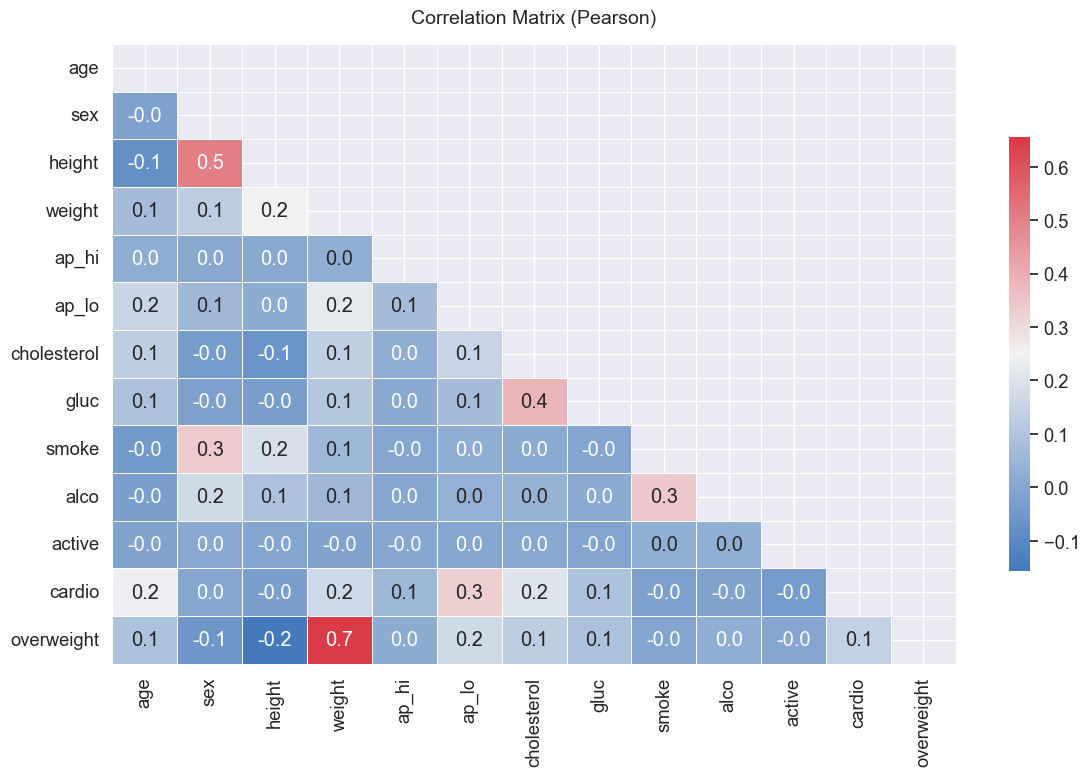

In [19]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8)) 
sns.set(font_scale=1.2)     


cmap = sns.diverging_palette(250, 10, as_cmap=True, center="light")


sns.heatmap(
    corr_matrix, 
    mask=mask,             
    annot=True, 
    fmt=".1f",            
    cmap=cmap,             
    linewidths=.5,         
    cbar_kws={"shrink": .7} 
)

plt.title("Correlation Matrix (Pearson)", y=1.02, fontsize=14)  

plt.show()